## Problem Statement:
### We're having some census data based on which we've to predict whether or not the income of an individual exceeds 50k/year or not.
### So, this is a Classification Problem: The two classes are Less than or equal to 50k/yr or More than 50k/yr

## Data Set Information
- Extraction was done by Barry Becker from the 1994 Census database. A set of reasonably clean records was extracted using the following conditions: ((AAGE>16) && (AGI>100) && (AFNLWGT>1)&& (HRSWK>0))

- Prediction task is to determine whether a person makes over 50K a year.

## Attribute Information
- Listing of attributes:

- >50K, <=50K.

- age: continuous.
- workclass: Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked.
- fnlwgt: continuous.
- education: Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool.
- education-num: continuous.
- marital-status: Married-civ-spouse (Married-Civilian-Spouse), Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse (Married-Armed Forces-Spouse).
- occupation: Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces.
- relationship: Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried.
- race: White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black.
- sex: Female, Male.
- capital-gain: continuous.
- capital-loss: continuous.
- hours-per-week: continuous.
- native-country: United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands.

## Importing Libraries for Data Analysis

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
features = ['age', 'workclass', 'fnlwgt', 'education', 'education-num', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'capital-gain', 'capital-loss', 'hours-per-week', 'native-country', 'salary']

## Data Ingestion

In [3]:
data=pd.read_csv('adult.data')
data.columns = features
data.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


In [4]:
data.describe()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,32560.000000,3.256000e+04,32560.000000,32560.000000,32560.000000,32560.000000
mean,38.581634,1.897818e+05,10.080590,1077.615172,87.306511,40.437469
std,13.640642,1.055498e+05,2.572709,7385.402999,402.966116,12.347618
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178315e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783630e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370545e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32560 entries, 0 to 32559
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32560 non-null  int64 
 1   workclass       32560 non-null  object
 2   fnlwgt          32560 non-null  int64 
 3   education       32560 non-null  object
 4   education-num   32560 non-null  int64 
 5   marital-status  32560 non-null  object
 6   occupation      32560 non-null  object
 7   relationship    32560 non-null  object
 8   race            32560 non-null  object
 9   sex             32560 non-null  object
 10  capital-gain    32560 non-null  int64 
 11  capital-loss    32560 non-null  int64 
 12  hours-per-week  32560 non-null  int64 
 13  native-country  32560 non-null  object
 14  salary          32560 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [6]:
data.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
salary            0
dtype: int64

In [7]:
data.isna().sum()

age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
salary            0
dtype: int64

## EDA

In [8]:
data.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


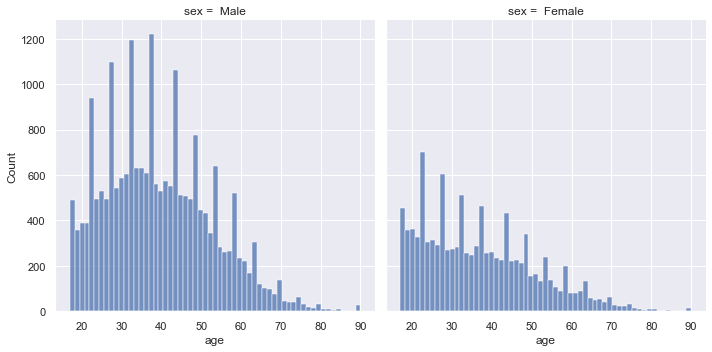

In [9]:
sns.set_theme()
sns.displot(data=data, x='age', col='sex')

<AxesSubplot: xlabel='workclass', ylabel='count'>

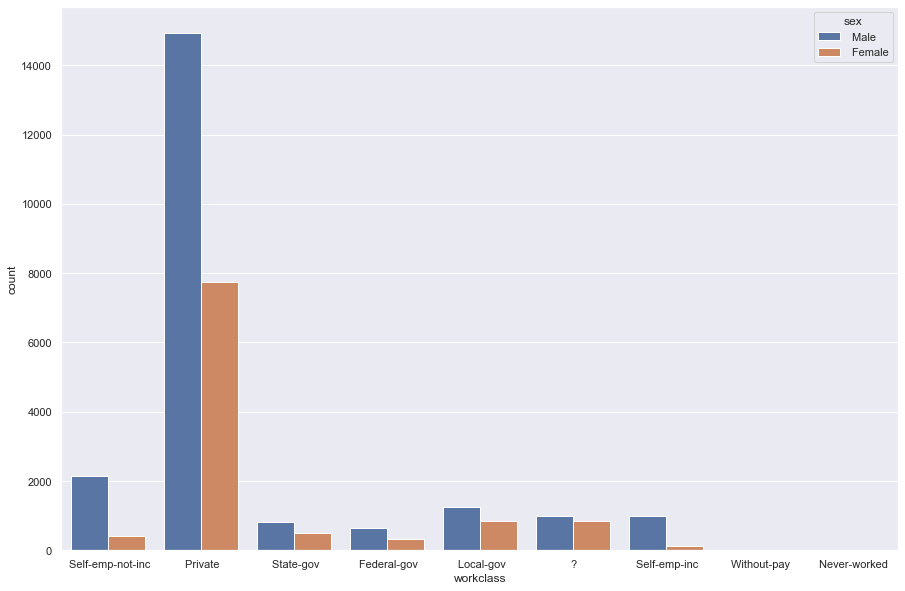

In [10]:
plt.figure(figsize=(15,10))
sns.countplot(data=data, x='workclass', hue='sex')

# Most Common working Class is Private

<AxesSubplot: xlabel='education', ylabel='count'>

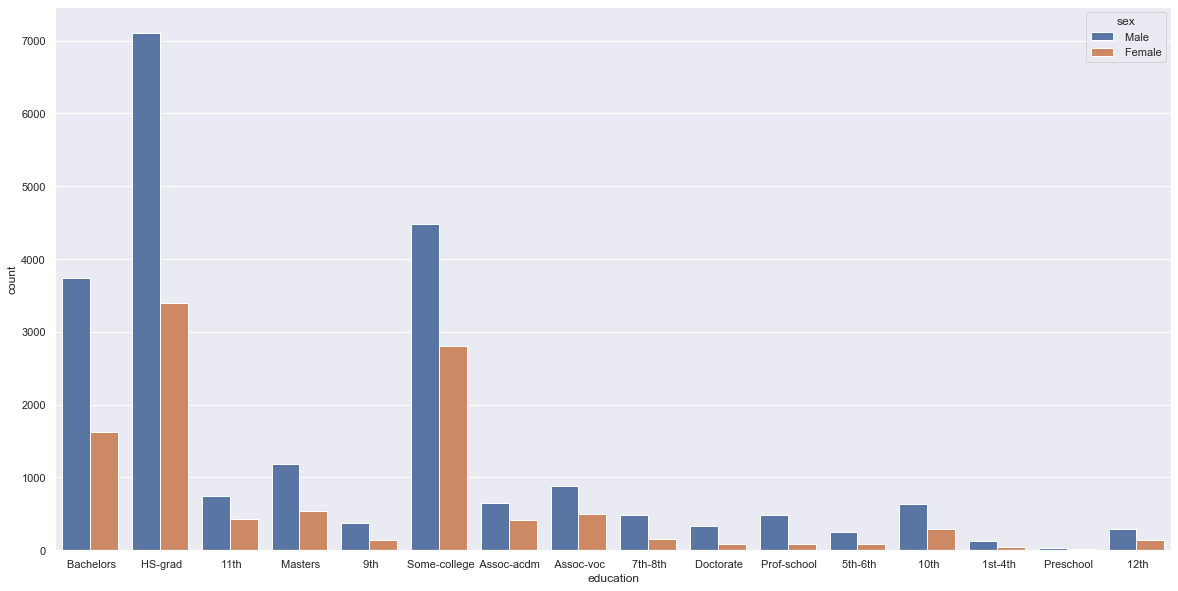

In [11]:
plt.figure(figsize=(20,10))
sns.countplot(data=data, x='education', hue='sex')

# Most peope are HS-Grad

In [12]:
data['education-num'].unique()

array([13,  9,  7, 14,  5, 10, 12, 11,  4, 16, 15,  3,  6,  2,  1,  8],
      dtype=int64)

In [13]:
edu_dict = {
    1: 'Preschool', 2: '1st-4th', 3: '5th-6th', 4: '7th-8th', 5: '9th', 6: '10th', 7: '11th', 8: '12th', 9: 'HS-grad', 
    10: 'Some-college', 11: 'Assoc-voc', 12: 'Assoc-acdm', 13: 'Bachelors', 14: 'Masters', 15: 'Prof-School',
    16: 'Doctorate'
}  

# This dictionary will help us later in encoding this variable

<AxesSubplot: xlabel='marital-status', ylabel='count'>

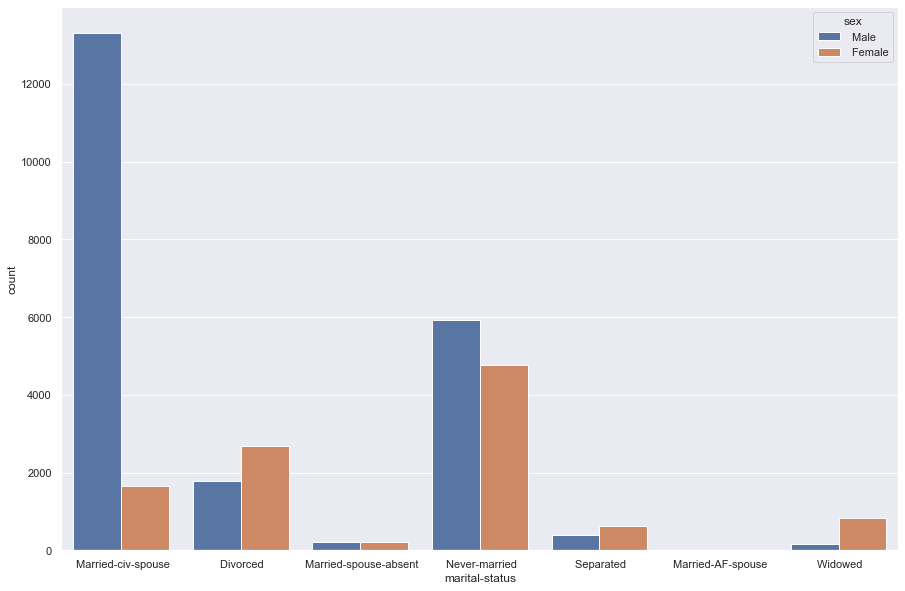

In [14]:
plt.figure(figsize=(15,10))
sns.countplot(data=data, x='marital-status', hue='sex')

# Married Working Males mostly have a civilian spouse. 
# Working females are more divorced than working males.

##### The fnlwgt (FInal-Weight) variable is of utmost importance. Rows that are having identical features have been assigned similar set of weights. We can use this variable to predict our classes bcoz similar weights will belong to the same class.
#### There is also a problem with this feature. The wieghts are not standardized for the countries, meaning two people, one living in USA & other in some backward country can have same set of weights, which will ruin our model.

In [15]:
data.loc[data['native-country'] == ' United-States']['fnlwgt'].sort_values(ascending=True)

17095      12285
27206      13769
24011      18827
10825      19214
2150       19302
          ...   
8257     1226583
15568    1268339
16738    1366120
18137    1455435
14448    1484705
Name: fnlwgt, Length: 29169, dtype: int64

In [16]:
data.loc[10825, :]

age                               25
workclass                    Private
fnlwgt                         19214
education                    HS-grad
education-num                      9
marital-status         Never-married
occupation         Handlers-cleaners
relationship           Not-in-family
race                           White
sex                             Male
capital-gain                       0
capital-loss                       0
hours-per-week                    40
native-country         United-States
salary                         <=50K
Name: 10825, dtype: object

In [17]:
data.loc[2150, :]

age                           30
workclass                Private
fnlwgt                     19302
education           Some-college
education-num                 10
marital-status     Never-married
occupation          Adm-clerical
relationship       Not-in-family
race                       White
sex                         Male
capital-gain                   0
capital-loss                   0
hours-per-week                48
native-country     United-States
salary                     <=50K
Name: 2150, dtype: object

In [18]:
data['fnlwgt'].sort_values()

17095      12285
27206      13769
25742      14878
24011      18827
10825      19214
          ...   
8257     1226583
15568    1268339
16738    1366120
18137    1455435
14448    1484705
Name: fnlwgt, Length: 32560, dtype: int64

In [19]:
data.loc[8257, :]

age                                35
workclass                     Private
fnlwgt                        1226583
education                   Bachelors
education-num                      13
marital-status     Married-civ-spouse
occupation                      Sales
relationship                  Husband
race                            White
sex                              Male
capital-gain                        0
capital-loss                        0
hours-per-week                     52
native-country          United-States
salary                           >50K
Name: 8257, dtype: object

In [20]:
data.loc[15568, :]

age                                   29
workclass                        Private
fnlwgt                           1268339
education                        HS-grad
education-num                          9
marital-status     Married-spouse-absent
occupation                  Tech-support
relationship                   Own-child
race                               Black
sex                                 Male
capital-gain                           0
capital-loss                           0
hours-per-week                        40
native-country             United-States
salary                             <=50K
Name: 15568, dtype: object

As it's evident from the above example that how dangerous can this feature may become if not handled properly

<AxesSubplot: xlabel='education-num', ylabel='hours-per-week'>

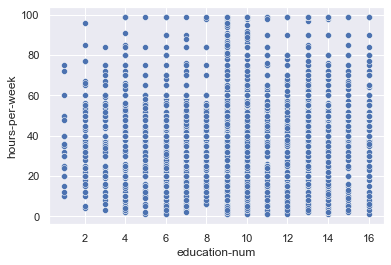

In [21]:
sns.scatterplot(data=data, x='education-num', y='hours-per-week')

<AxesSubplot: xlabel='race', ylabel='count'>

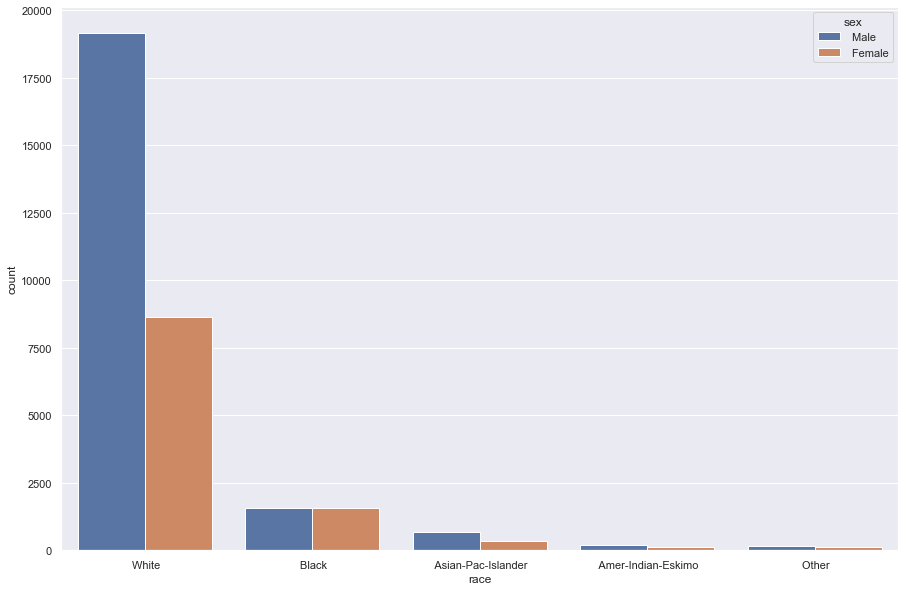

In [22]:
plt.figure(figsize=(15,10))
sns.countplot(data=data, x='race', hue='sex')

<AxesSubplot: xlabel='native-country', ylabel='count'>

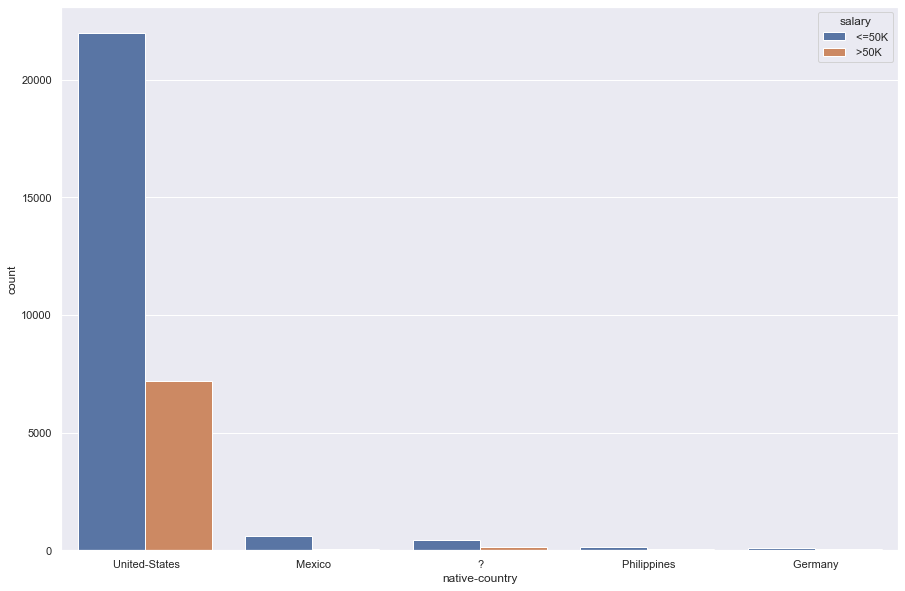

In [23]:
plt.figure(figsize=(15,10))

# Plotting only for top 5 countries
sns.countplot(data=data, x='native-country', hue='salary', order=data['native-country'].value_counts().iloc[0:5].index)

In [24]:
data.dtypes

age                int64
workclass         object
fnlwgt             int64
education         object
education-num      int64
marital-status    object
occupation        object
relationship      object
race              object
sex               object
capital-gain       int64
capital-loss       int64
hours-per-week     int64
native-country    object
salary            object
dtype: object

<AxesSubplot: xlabel='education-num'>

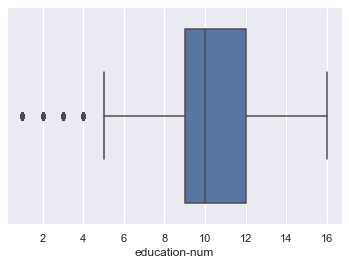

In [25]:
sns.boxplot(data=data, x='education-num')  # NO need to remove outliers

<AxesSubplot: >

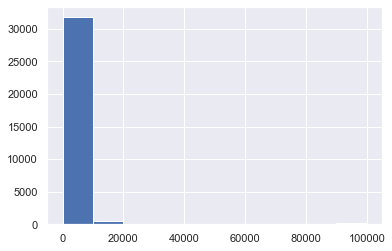

In [26]:
data['capital-gain'].hist()   # Not a great feature, will drop it

<AxesSubplot: >

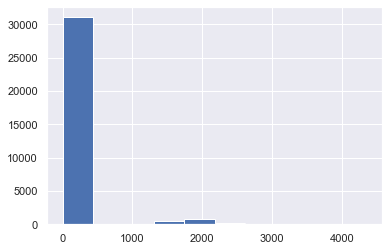

In [27]:
data['capital-loss'].hist()      # Not a great feature, will drop it

- plt.figure(figsize=(15,5))
- sns.boxplot(data=data, x='hours-per-week')  ## Too many outliers
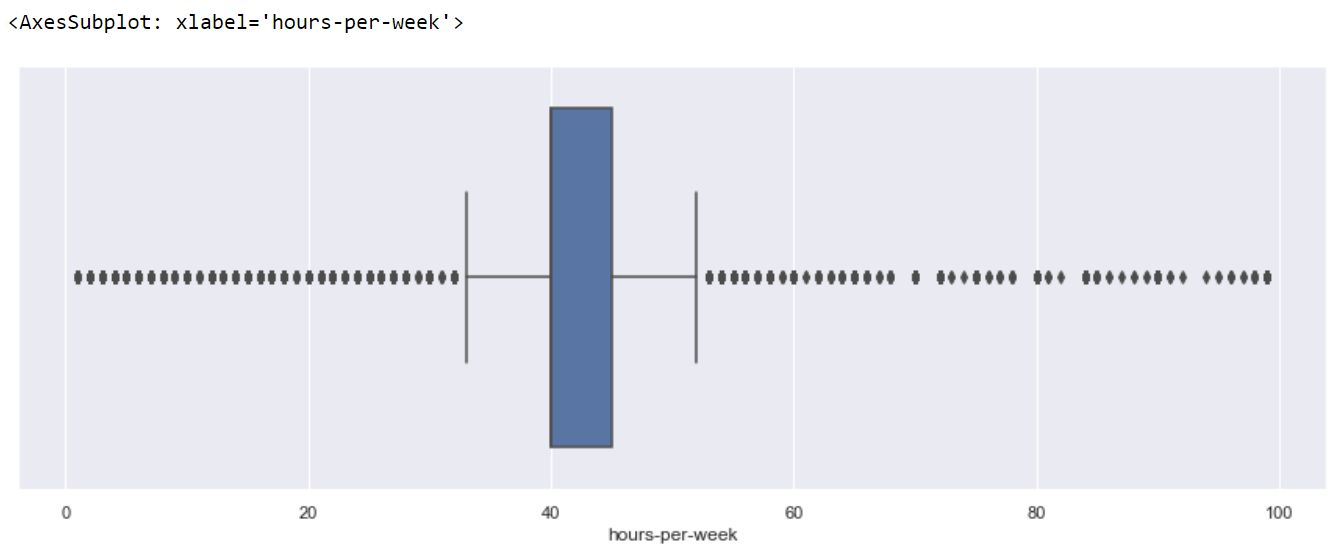

<AxesSubplot: xlabel='salary', ylabel='count'>

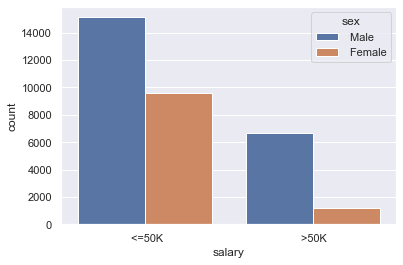

In [28]:
sns.countplot(data=data, x='salary', hue='sex')
# Classes are highly imbalanced. If we simply make a Dummy Model to find less than 50k, we still get an accuracy of 70%
# without even training a classifier

## Handlind Outliers

In [29]:
# Handling outliers from the hours-per-week variable by capping them with the maximum and minimum value

In [30]:
# Creating a copy of our dataset
data_copy = data.copy()

In [31]:
q1 = np.quantile(data['hours-per-week'], 0.25)
q3 = np.quantile(data['hours-per-week'], 0.75)
iqr = q3-q1

q1, q3, iqr

(40.0, 45.0, 5.0)

In [32]:
lwr_bnd = q1 - 1.5*iqr
upp_bnd = q3 + 1.5*iqr

lwr_bnd, upp_bnd

(32.5, 52.5)

In [33]:
max_threshold = np.quantile(data['hours-per-week'], 0.95)
min_threshold = np.quantile(data['hours-per-week'], 0.05)

min_threshold, max_threshold

(18.0, 60.0)

In [34]:
data_copy['hours-per-week'] = np.where(data_copy['hours-per-week']>upp_bnd , max_threshold, np.where(data_copy['hours-per-week']<lwr_bnd, min_threshold, data_copy['hours-per-week']))

<AxesSubplot: xlabel='hours-per-week'>

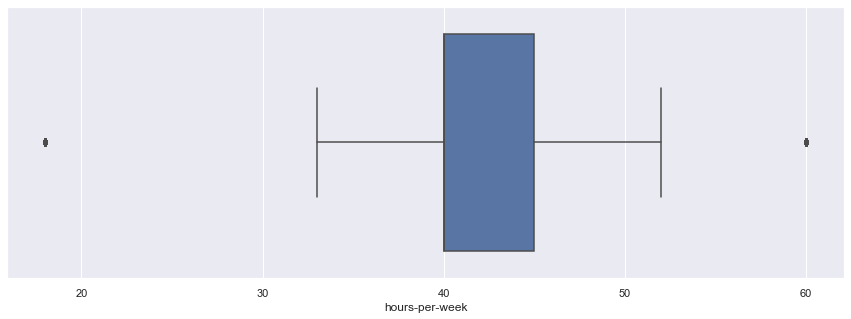

In [35]:
plt.figure(figsize=(15,5))
sns.boxplot(data=data_copy, x='hours-per-week')

## Feature-Engineering

In [36]:
data_copy.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,18.0,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40.0,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40.0,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40.0,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40.0,United-States,<=50K


In [37]:
# Removing features that might not be useful for our classification model
data_copy.drop(labels=['fnlwgt', 'education', 'capital-gain', 'capital-loss'], axis=1, inplace=True)

In [38]:
data_copy.head()

,age,workclass,education-num,marital-status,occupation,relationship,race,sex,hours-per-week,native-country,salary
0,50,Self-emp-not-inc,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,18.0,United-States,<=50K
1,38,Private,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,40.0,United-States,<=50K
2,53,Private,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,40.0,United-States,<=50K
3,28,Private,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,40.0,Cuba,<=50K
4,37,Private,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,40.0,United-States,<=50K


### Encoding some categorical variables

In [39]:
# Encoding the sex varible
data_copy['sex'].unique()

array([' Male', ' Female'], dtype=object)

In [40]:
data_copy['sex'].replace(to_replace=' Male', value=1, inplace=True)
data_copy['sex'].replace(to_replace=' Female', value=0, inplace=True)

In [41]:
# data_copy.shape Initial
# (32560, 11)

In [42]:
# Removing categories for variables that are very less in number

In [43]:
from collections import Counter

def cumulatively_categorise(column,threshold=0.75,return_categories_list=True):
    #Find the threshold value using the percentage and number of instances in the column
    threshold_value=int(threshold*len(column))
    #Initialise an empty list for our new minimised categories
    categories_list=[]
    #Initialise a variable to calculate the sum of frequencies
    s=0
    #Create a counter dictionary of the form unique_value: frequency
    counts=Counter(column)

    #Loop through the category name and its corresponding frequency after sorting the categories by descending order of frequency
    for i,j in counts.most_common():
        #Add the frequency to the global sum
        s+=dict(counts)[i]
        #Append the category name to the list
        categories_list.append(i)
        #Check if the global sum has reached the threshold value, if so break the loop
        if s>=threshold_value:
            break
    #Append the category Other to the list
    categories_list.append('Other')

    #Replace all instances not in our new categories by Other  
    new_column=column.apply(lambda x: x if x in categories_list else 'Other')
    #column = new_column

    #Return transformed column and unique values if return_categories=True
    if(return_categories_list):
        return new_column,categories_list
    #Return only the transformed column if return_categories=False
    else:
        return new_column
    

In [44]:
for i in ['occupation', 'workclass', 'marital-status', 'race', 'relationship', 'native-country']:
    trans_col, cat_list = cumulatively_categorise(column=data_copy[i])
    data_copy[i] = trans_col

In [45]:
data_copy.head()

,age,workclass,education-num,marital-status,occupation,relationship,race,sex,hours-per-week,native-country,salary
0,50,Self-emp-not-inc,13,Married-civ-spouse,Exec-managerial,Husband,White,1,18.0,United-States,<=50K
1,38,Private,9,Other,Other,Not-in-family,White,1,40.0,United-States,<=50K
2,53,Private,7,Married-civ-spouse,Other,Husband,Other,1,40.0,United-States,<=50K
3,28,Private,13,Married-civ-spouse,Prof-specialty,Other,Other,0,40.0,Other,<=50K
4,37,Private,14,Married-civ-spouse,Exec-managerial,Other,White,0,40.0,United-States,<=50K


### Reducing the high cardinality of some categorical columns

In [46]:
## occuptaion

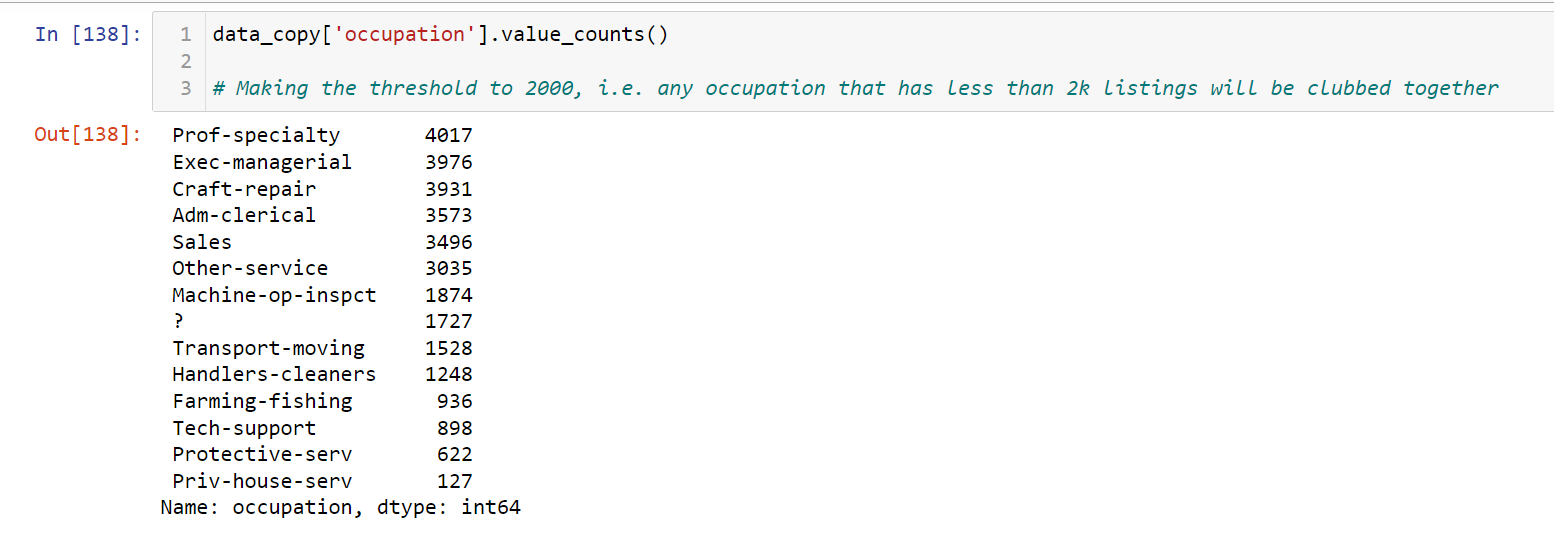

### Useless
cat_occu = data_copy.loc[(data_copy['occupation'] == ' Machine-op-inspct') | (data_copy['occupation'] == ' ?') | 
              (data_copy['occupation'] == ' Handlers-cleaners') | (data_copy['occupation'] == ' Transport-moving') | 
              (data_copy['occupation'] == ' Farming-fishing') | (data_copy['occupation'] == ' Tech-support') | 
              (data_copy['occupation'] == ' Protective-serv') | (data_copy['occupation'] == ' Priv-house-serv')].index

## Encoding

In [47]:
# Reponse Variable: Salary
data_copy['salary'] = np.where(data_copy['salary'] == ' <=50K', 0, 1)

In [48]:
data_copy.head()

,age,workclass,education-num,marital-status,occupation,relationship,race,sex,hours-per-week,native-country,salary
0,50,Self-emp-not-inc,13,Married-civ-spouse,Exec-managerial,Husband,White,1,18.0,United-States,0
1,38,Private,9,Other,Other,Not-in-family,White,1,40.0,United-States,0
2,53,Private,7,Married-civ-spouse,Other,Husband,Other,1,40.0,United-States,0
3,28,Private,13,Married-civ-spouse,Prof-specialty,Other,Other,0,40.0,Other,0
4,37,Private,14,Married-civ-spouse,Exec-managerial,Other,White,0,40.0,United-States,0


In [49]:
encoding_dict = {
    'workclass': 2,
    'marital-status': 2,
    'occupation': 5,
    'relationship': 3,
    'race': 1,
    'native-country':  1,
}

In [50]:
def encode_column(data, col_name, n_components):
    """This function encodes a categorical column and returns the result in no of cols that we like"""
    
    import category_encoders as ce 
    encoder=ce.HashingEncoder(cols=col_name, n_components=n_components)
    hash_res = encoder.fit_transform(data[col_name])
    
    # Concatinating the data & hash result
    data = pd.concat([data,hash_res], axis=1)
    
    # Creating a loop for changing the names of the new cols according to the input variable
    col_list = dict()
    for i in range(n_components):
        col_list[f'col_{i}'] = col_name + f'_{i}'
    
    # Renaming the columns
    data.rename(columns=col_list, inplace=True)
    
    # Dropping the input column as it is now encoded
    data.drop(col_name, axis=1, inplace=True)
    
    return data

In [51]:
for k in encoding_dict:
    data_copy = encode_column(data_copy, col_name=k, n_components=encoding_dict[k])

In [52]:
data_copy

,age,education-num,sex,hours-per-week,salary,workclass_0,workclass_1,marital-status_0,marital-status_1,occupation_0,occupation_1,occupation_2,occupation_3,occupation_4,relationship_0,relationship_1,relationship_2,race_0,native-country_0
0,50,13,1,18.0,0,0,1,1,0,0,0,0,1,0,1,0,0,1,1
1,38,9,1,40.0,0,0,1,0,1,0,1,0,0,0,0,0,1,1,1
2,53,7,1,40.0,0,0,1,1,0,0,1,0,0,0,1,0,0,1,1
3,28,13,0,40.0,0,0,1,1,0,1,0,0,0,0,1,0,0,1,1
4,37,14,0,40.0,0,0,1,1,0,0,0,0,1,0,1,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,27,12,0,38.0,0,0,1,1,0,0,1,0,0,0,1,0,0,1,1
32556,40,9,1,40.0,1,0,1,1,0,0,0,0,1,0,1,0,0,1,1
32557,58,9,0,40.0,0,0,1,0,1,0,1,0,0,0,1,0,0,1,1
32558,22,9,1,18.0,0,0,1,1,0,0,1,0,0,0,0,0,1,1,1


In [53]:
import pickle

In [54]:
with open('my_df.txt', 'wb') as f:
    pickle.dump(obj=data_copy, file=f)
f.close()

In [55]:
with open('my_df.txt', 'rb') as f:
    df_unpickle = pickle.load(f)

In [56]:
df_unpickle

# Same as our original dataframe

,age,education-num,sex,hours-per-week,salary,workclass_0,workclass_1,marital-status_0,marital-status_1,occupation_0,occupation_1,occupation_2,occupation_3,occupation_4,relationship_0,relationship_1,relationship_2,race_0,native-country_0
0,50,13,1,18.0,0,0,1,1,0,0,0,0,1,0,1,0,0,1,1
1,38,9,1,40.0,0,0,1,0,1,0,1,0,0,0,0,0,1,1,1
2,53,7,1,40.0,0,0,1,1,0,0,1,0,0,0,1,0,0,1,1
3,28,13,0,40.0,0,0,1,1,0,1,0,0,0,0,1,0,0,1,1
4,37,14,0,40.0,0,0,1,1,0,0,0,0,1,0,1,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,27,12,0,38.0,0,0,1,1,0,0,1,0,0,0,1,0,0,1,1
32556,40,9,1,40.0,1,0,1,1,0,0,0,0,1,0,1,0,0,1,1
32557,58,9,0,40.0,0,0,1,0,1,0,1,0,0,0,1,0,0,1,1
32558,22,9,1,18.0,0,0,1,1,0,0,1,0,0,0,0,0,1,1,1


In [57]:
from sklearn.model_selection import train_test_split

In [58]:
X = data_copy.drop('salary', axis=1)
y = data_copy['salary']

In [59]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.33, random_state=42)

### Scaling our data

In [60]:
from sklearn.preprocessing import StandardScaler

In [61]:
scalar = StandardScaler()

In [62]:
X_train_scaled = scalar.fit_transform(X_train)

## Model Training

In [63]:
from sklearn.linear_model import LogisticRegression

In [64]:
logit_reg = LogisticRegression()

In [65]:
logit_reg.fit(X_train_scaled, y_train)

LogisticRegression()

In [66]:
# Scaling our test data to predict
X_test_scaled = scalar.transform(X_test)

### Making Predictions

In [67]:
predictions = logit_reg.predict(X_test_scaled)

#### Performance Evaluation

In [68]:
from sklearn.metrics import accuracy_score, confusion_matrix

In [69]:
conf_mat_logit = confusion_matrix(y_test, predictions)
conf_mat_logit

array([[7530,  586],
       [1373, 1256]], dtype=int64)

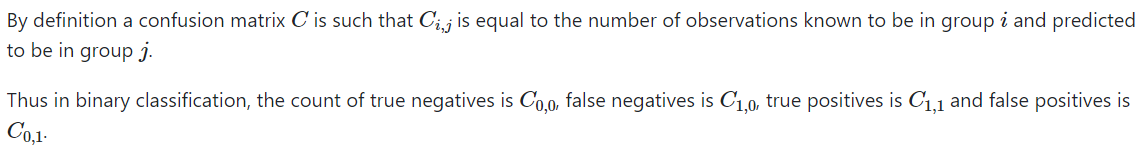

In [70]:
# For us precision is more important
precision = conf_mat_logit[1][1] / (conf_mat_logit[1][1] + conf_mat_logit[0][1])
precision

0.6818675352877307

In [71]:
accuracy_score(y_test, predictions)

0.8176826430898092

## Making another model

In [72]:
from sklearn.svm import SVC

In [73]:
svc = SVC()

In [74]:
svc.fit(X_train_scaled, y_train)

SVC()

In [75]:
predictions_svc = svc.predict(X_test_scaled)

In [76]:
conf_mat_svc = confusion_matrix(y_test, predictions_svc)
conf_mat_svc

array([[7640,  476],
       [1454, 1175]], dtype=int64)

In [77]:
# For us precision is more important
precision_svc = conf_mat_svc[1][1] / (conf_mat_svc[1][1] + conf_mat_svc[0][1])
precision_svc

0.7116898849182314

In [78]:
accuracy_score(y_test, predictions_svc)

0.8203815728245696

## Logistic Regression gave us an Accuracy of 81% & Precision of 68%. SVC is better in both


In [79]:
# saving both the models
with open('logit_reg_model.txt', 'wb') as f_lg:
    pickle.dump(obj=logit_reg, file=f_lg)
f_lg.close()

In [80]:
with open('svc_model.txt', 'wb') as f_svc:
    pickle.dump(obj=svc, file=f_svc)
f_svc.close()

## Hyper-Parameter Tuning

In [81]:
from sklearn.model_selection import GridSearchCV

In [82]:
clf = GridSearchCV(svc, {
    'C':[1,10,20],
    'kernel': ['rbf', 'linear']
}, cv=5, return_train_score=False)

In [83]:
clf.fit(X_train_scaled, y_train)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [1, 10, 20], 'kernel': ['rbf', 'linear']})

In [86]:
cv_results = pd.DataFrame(clf.cv_results_)

In [87]:
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_kernel,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,20.653543,2.409922,7.715598,0.313549,1,rbf,"{'C': 1, 'kernel': 'rbf'}",0.826496,0.826954,0.823974,0.827412,0.823058,0.825579,0.001733,1
1,18.225580,0.845041,1.957241,0.043722,1,linear,"{'C': 1, 'kernel': 'linear'}",0.823974,0.824662,0.820307,0.823058,0.822599,0.822920,0.001490,6
2,25.032976,0.616112,7.403029,0.042236,10,rbf,"{'C': 10, 'kernel': 'rbf'}",0.825350,0.824662,0.822599,0.827412,0.824662,0.824937,0.001544,2
3,37.712842,1.128147,1.975859,0.035215,10,linear,"{'C': 10, 'kernel': 'linear'}",0.824204,0.824662,0.820536,0.823058,0.822599,0.823012,0.001445,5
4,30.025764,2.300600,7.424072,0.449152,20,rbf,"{'C': 20, 'kernel': 'rbf'}",0.823974,0.824891,0.822828,0.828100,0.824662,0.824891,0.001758,3
5,50.591913,1.473844,1.958849,0.017289,20,linear,"{'C': 20, 'kernel': 'linear'}",0.824204,0.824662,0.820307,0.823058,0.822828,0.823012,0.001516,4


In [89]:
results = cv_results[['param_C', 'param_kernel', 'mean_test_score']]

In [90]:
results

,param_C,param_kernel,mean_test_score
0,1,rbf,0.825579
1,1,linear,0.822920
2,10,rbf,0.824937
3,10,linear,0.823012
4,20,rbf,0.824891
5,20,linear,0.823012


In [91]:
# saving the result df
with open('cv_result.txt', 'wb') as f:
    pickle.dump(obj=results, file=f)